In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.constants import c, pi

from tqdm.notebook import tqdm  # Needs installation of jupyter and ipywidgets packages

import sys
sys.path.append('../')

try:
    import imp
    try:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
        lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
    except:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v231\\api\\python\\')
        lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py')
except:
    print('imp module not found. Trying with importlib...')
    from importlib.machinery import SourceFileLoader
    try:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
        lumapi = SourceFileLoader('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py').load_module()
    except:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v231\\api\\python\\')
        lumapi = SourceFileLoader('lumapi','C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py').load_module()

plt.rcParams["figure.figsize"] = (8,6) 
plt.rc('font', size=12)

imp module not found. Trying with importlib...


C:\Program Files\Lumerical\v202\api\python\lumapi.py:797: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [48]:
inter = lumapi.INTERCONNECT(filename='AnalysisCaio.icp')

# MZI Ideal Cell Test

In [50]:
inter.switchtolayout()
inter.deleteall()
inter.addelement('MZI Ideal Cell')
inter.set('x position',0)
inter.set('y position',300)
inter.addelement('Optical Network Analyzer')
inter.set('number of input ports',3)

inter.connect('ONA_1','output','IDEAL CELL_1','port 1')
inter.connect('ONA_1','input 1','IDEAL CELL_1','port 3')
inter.connect('ONA_1','input 2','IDEAL CELL_1','port 4')
inter.connect('ONA_1','input 3','IDEAL CELL_1','port 2')

1.0

  0%|          | 0/60 [00:00<?, ?it/s]

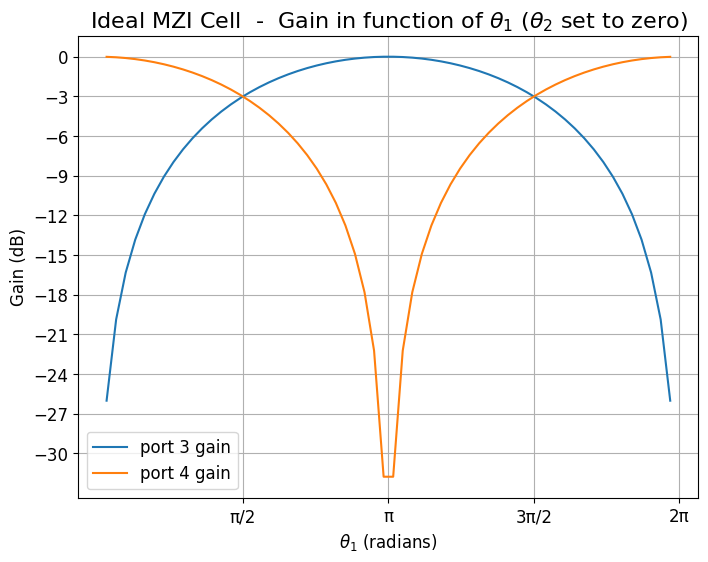

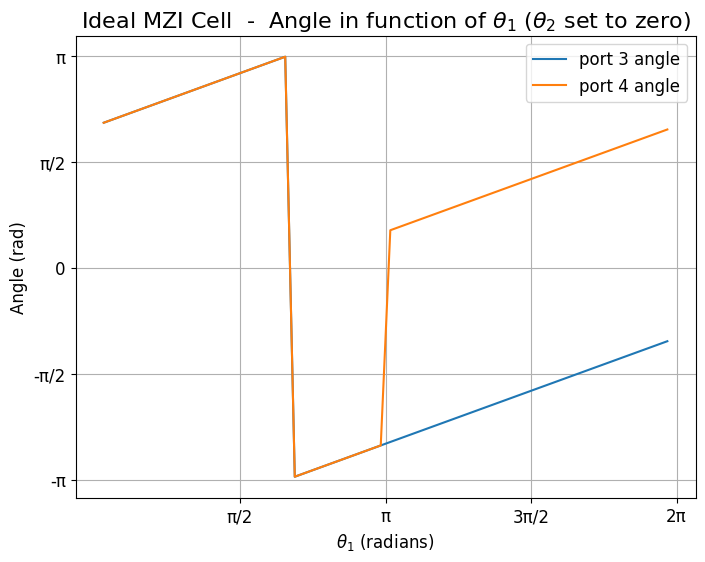

In [77]:
Theta1Array = np.linspace(0.1,2*pi-0.1,60)

progress = tqdm(total= len(Theta1Array))

Port1Gain = np.zeros(len(Theta1Array))
Port2Gain = np.zeros(len(Theta1Array))
Port1Angle = np.zeros(len(Theta1Array))
Port2Angle = np.zeros(len(Theta1Array))

for i in range(len(Theta1Array)):
    inter.switchtolayout()
    inter.setnamed('IDEAL CELL_1','Theta 1',Theta1Array[i])
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][0]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)'][0]
    Port1Angle[i] = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)'][0]
    Port2Angle[i] = inter.getresult('ONA_1','input 2/mode 1/angle')['TE angle (rad)'][0]

    progress.update(1)

plt.figure(figsize=(8,6))
plt.plot(Theta1Array,Port1Gain,label='port 3 gain')
plt.plot(Theta1Array,Port2Gain,label='port 4 gain')
plt.xlabel('$θ_1$ (radians)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('Ideal MZI Cell  -  Gain in function of $θ_1$ ($θ_2$ set to zero)',fontsize=16)
dxArray = {'π/2':pi/2 , 'π':pi, '3π/2':3*pi/2, '2π':2*pi}
plt.xticks(list(dxArray.values()), labels=dxArray.keys())
dyArray = [0,-3,-6,-9,-12,-15,-18,-21,-24,-27,-30]
plt.yticks(dyArray)
plt.legend()
plt.grid()

datapath = 'Media/Ideal MZI Cell'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Gain x Theta1" + ".png", transparent=False, facecolor="white", bbox_inches="tight")


plt.figure(figsize=(8,6))
plt.plot(Theta1Array,Port1Angle,label='port 3 angle')
plt.plot(Theta1Array,Port2Angle,label='port 4 angle')
plt.xlabel('$θ_1$ (radians)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title('Ideal MZI Cell  -  Angle in function of $θ_1$ ($θ_2$ set to zero)',fontsize=16)
dxArray = {'π/2':pi/2 , 'π':pi, '3π/2':3*pi/2, '2π':2*pi}
plt.xticks(list(dxArray.values()), labels=dxArray.keys())
dyArray = {'-π':-pi , '-π/2':-pi/2, '0':0, 'π/2':pi/2, 'π':pi}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.legend()
plt.grid()

datapath = 'Media/Ideal MZI Cell'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Angle x Theta1" + ".png", transparent=False, facecolor="white", bbox_inches="tight")